## Análisis exporatorio de datos con Pandas
En este tutorial utilizaremos algunas funciones de Pandas para el análisis exploratorio de datos. El dataset a usar está disponible en: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/pablora19/COVID19_EC/master/covid_ec.csv')
datos.head()

,infografia,fecha,hora,id_provincia,nombre_provincia,id_canton,nombre_canton,cerco_epid_act,Casos confirmados,poblacion_canton,poblacion_provincia
0,2,13/3/2020,17:00,9,guayas,901,guayaquil,279,7,2723665,4387434
1,2,13/3/2020,17:00,12,los rios,1201,babahoyo,279,11,175281,921763
2,2,13/3/2020,17:00,17,pichincha,1701,quito,279,4,2781641,3228233
3,2,13/3/2020,17:00,21,Sucumbios,2101,lago agrio,279,1,119594,230503
4,3,14/3/2020,15:00,1,azuay,101,cuenca,317,1,636996,881394


Cuál es la cantidad de datos en el dataset?

In [3]:
datos.shape

(4516, 11)

Observar las fechas de los últimos datos:

In [4]:
datos.tail()

,infografia,fecha,hora,id_provincia,nombre_provincia,id_canton,nombre_canton,cerco_epid_act,Casos confirmados,poblacion_canton,poblacion_provincia
4511,59,23/4/2020,8:00,19,zamora chinchipe,1901,Zamora,NaN,15,32761,120416
4512,59,23/4/2020,8:00,19,zamora chinchipe,1907,centinela del condor,NaN,3,8313,120416
4513,59,23/4/2020,8:00,20,galapagos,2001,san cristobal,NaN,13,9667,33042
4514,59,23/4/2020,8:00,20,galapagos,2002,isabela,NaN,3,3073,33042
4515,59,23/4/2020,8:00,20,galapagos,2003,santa cruz,NaN,38,20302,33042


Una descripción estadística sencilla y rápida de los datos

In [5]:
datos[['Casos confirmados', 'poblacion_canton', 'poblacion_provincia', 'cerco_epid_act']].describe()

,Casos confirmados,poblacion_canton
count,4516.000000,4.516000e+03
mean,38.291851,1.291850e+05
std,275.649043,3.743567e+05
min,1.000000,0.000000e+00
25%,1.000000,2.093500e+04
50%,3.000000,4.500400e+04
75%,12.000000,9.505200e+04
max,5565.000000,2.781641e+06


In [6]:
# datos.plot.scatter(x='poblacion_provincia', y='Casos confirmados')
x = datos.groupby('nombre_provincia')['Casos confirmados'].sum()
x

nombre_provincia
Sucumbios                     908
azuay                        4338
bolivar                       969
carchi                        526
cañar                        2419
chimborazo                   1844
cotopaxi                      893
el oro                       3757
esmeraldas                   1163
galapagos                     569
guayas                     120768
imbabura                      830
loja                         1742
los rios                     6142
manabi                       4833
morona santiago               531
napo                          123
orellana                      145
pastaza                       354
pichincha                   15200
santa elena                  2161
santo domingo tsachilas      1490
tungurahua                   1034
zamora chinchipe              187
Name: Casos confirmados, dtype: int64

<AxesSubplot:xlabel='nombre_provincia'>

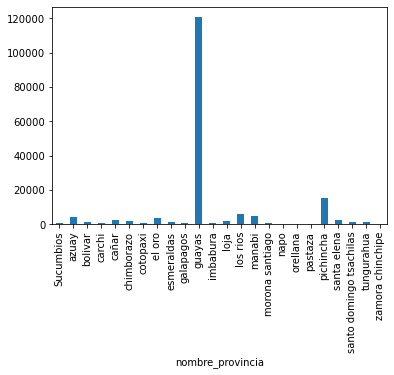

In [7]:
x.plot.bar()

<AxesSubplot:ylabel='Casos confirmados'>

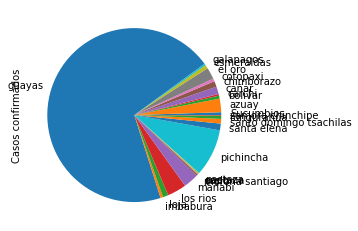

In [8]:
datos.groupby('nombre_provincia')['Casos confirmados'].sum().plot.pie()

In [9]:
pichincha_df = datos[datos['nombre_provincia']=='pichincha']
pichincha_df

,infografia,fecha,hora,id_provincia,nombre_provincia,id_canton,nombre_canton,cerco_epid_act,Casos confirmados,poblacion_canton,poblacion_provincia
2,2,13/3/2020,17:00,17,pichincha,1701,quito,279,4,2781641,3228233
7,3,14/3/2020,15:00,17,pichincha,1701,quito,317,4,2781641,3228233
12,5,15/3/2020,18:00,17,pichincha,1701,quito,273,6,2781641,3228233
24,7,16/3/2020,16:00,17,pichincha,1701,quito,315,8,2781641,3228233
38,9,17/3/2020,9:00,17,pichincha,1701,quito,451,8,2781641,3228233
...,...,...,...,...,...,...,...,...,...,...,...
4478,59,23/4/2020,8:00,17,pichincha,1701,quito,NaN,919,2781641,3228233
4479,59,23/4/2020,8:00,17,pichincha,1704,pedro moncayo,NaN,2,43281,3228233
4480,59,23/4/2020,8:00,17,pichincha,1702,cayambe,NaN,1,107660,3228233
4481,59,23/4/2020,8:00,17,pichincha,1709,puerto quito,NaN,2,24911,3228233


In [10]:
pichincha_df.shape

(181, 11)

In [11]:
pichincha_df.dtypes

infografia              int64
fecha                  object
hora                   object
id_provincia            int64
nombre_provincia       object
id_canton               int64
nombre_canton          object
cerco_epid_act         object
Casos confirmados       int64
poblacion_canton        int64
poblacion_provincia    object
dtype: object

In [12]:
pichincha_df.describe()

,infografia,id_provincia,id_canton,Casos confirmados,poblacion_canton
count,181.000000,181.0,181.000000,181.000000,1.810000e+02
mean,43.044199,17.0,1703.994475,83.977901,7.028997e+05
std,12.822213,0.0,2.544050,195.833148,1.146425e+06
min,2.000000,17.0,1701.000000,1.000000,1.717100e+04
25%,37.000000,17.0,1702.000000,2.000000,4.328100e+04
50%,46.000000,17.0,1704.000000,4.000000,1.081670e+05
75%,53.000000,17.0,1705.000000,24.000000,1.154330e+05
max,59.000000,17.0,1709.000000,919.000000,2.781641e+06


In [13]:
pichincha_df.groupby('nombre_canton')['Casos confirmados'].sum()

nombre_canton
cayambe                       63
mejia                        344
pedro moncayo                 40
pedro vicente maldonado       75
puerto quito                  10
quito                      14090
rumiñahui                    578
Name: Casos confirmados, dtype: int64

In [14]:
pichincha_df.groupby('fecha')['Casos confirmados'].sum()

fecha
1/4/2020     248
10/4/2020    579
11/4/2020    606
12/4/2020    627
13/3/2020      4
13/4/2020    634
14/3/2020      4
14/4/2020    646
15/3/2020      6
15/4/2020    674
16/3/2020      8
16/4/2020    736
17/3/2020      8
17/4/2020    779
18/3/2020     12
18/4/2020    794
19/3/2020     16
19/4/2020    819
2/4/2020     259
20/3/2020     35
20/4/2020    841
21/3/2020     50
21/4/2020    868
22/3/2020     60
22/4/2020    926
23/3/2020     65
23/4/2020    991
24/3/2020     72
25/3/2020    108
26/3/2020    121
27/3/2020    137
28/3/2020    171
29/3/2020    188
3/4/2020     285
30/3/2020    191
31/3/2020    219
4/4/2020     321
5/4/2020     345
6/4/2020     395
7/4/2020     418
8/4/2020     440
9/4/2020     494
Name: Casos confirmados, dtype: int64

In [15]:
print(pichincha_df['fecha'].iloc[0])
print(type(pichincha_df['fecha'].iloc[0]))

13/3/2020
<class 'str'>


In [16]:
import datetime
# pichincha_df['fecha'] = pichincha_df['fecha'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y')
pichincha_df.loc[:,('fecha')] = pichincha_df['fecha'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))

/home/leninml/anaconda3/envs/tfv2Cuda10.1/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [17]:
print(pichincha_df['fecha'].iloc[0])
print(type(pichincha_df['fecha'].iloc[0]))

2020-03-13 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [18]:
pichincha_df.groupby('fecha')['Casos confirmados'].sum()

fecha
2020-03-13      4
2020-03-14      4
2020-03-15      6
2020-03-16      8
2020-03-17      8
2020-03-18     12
2020-03-19     16
2020-03-20     35
2020-03-21     50
2020-03-22     60
2020-03-23     65
2020-03-24     72
2020-03-25    108
2020-03-26    121
2020-03-27    137
2020-03-28    171
2020-03-29    188
2020-03-30    191
2020-03-31    219
2020-04-01    248
2020-04-02    259
2020-04-03    285
2020-04-04    321
2020-04-05    345
2020-04-06    395
2020-04-07    418
2020-04-08    440
2020-04-09    494
2020-04-10    579
2020-04-11    606
2020-04-12    627
2020-04-13    634
2020-04-14    646
2020-04-15    674
2020-04-16    736
2020-04-17    779
2020-04-18    794
2020-04-19    819
2020-04-20    841
2020-04-21    868
2020-04-22    926
2020-04-23    991
Name: Casos confirmados, dtype: int64

<AxesSubplot:xlabel='fecha'>

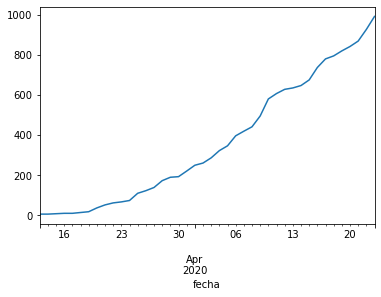

In [19]:
pichincha_df.groupby('fecha')['Casos confirmados'].sum().plot.line()